In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# import data
bank_df = pd.read_csv('/content/drive/MyDrive/BankChurnModelling.csv')

Data Analysis

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Set CustomerId as index, but before setting it as an index, check whether it's unique or not.

In [ ]:
bank_df.duplicated('CustomerId').sum()

0

In [ ]:
bank_df = bank_df.set_index('CustomerId')

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Data Encoding

1. Geography column

In [ ]:
bank_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
# Replace 'France','Germany' and 'Spain' with 1,2 and 3 respectively
bank_df.replace({'Geography':{'France':1,'Germany':2,'Spain':3}},inplace=True)

In [ ]:
bank_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,1,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,3,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,1,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,3,Female,43,2,125510.82,1,1,1,79084.10,0


2. Gender column

In [ ]:
bank_df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
# Replace 'Male' and 'Female' with 1 and 2 respectively
bank_df.replace({'Gender':{'Male':1,'Female':2}},inplace=True)

In [ ]:
bank_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,1,2,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,3,2,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,1,2,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,1,2,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,3,2,43,2,125510.82,1,1,1,79084.10,0


3. 'Num Of Products' column

In [ ]:
bank_df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [ ]:
# Replace 1 with 1, and 2,3,4 with 2, as sample for products 3 & 4 is very small
bank_df.replace({'Num Of Products':{1:1,2:2,3:2,4:2}},inplace=True)

In [ ]:
bank_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,1,2,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,3,2,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,1,2,42,8,159660.80,2,1,0,113931.57,1
15701354,Boni,699,1,2,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,3,2,43,2,125510.82,1,1,1,79084.10,0


4. 'Has Credit Card' column

In [ ]:
bank_df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


5. 'Is Active Member' column

In [ ]:
bank_df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [ ]:
# Check 'Churn' count for records where 'Balance' is 0
bank_df.loc[bank_df['Balance'] == 0,'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [ ]:
# Create a new column 'Zero balance', which contains 1 if balance > 0 otherwise 0
bank_df['Zero balance'] = np.where(bank_df['Balance'] > 0, 1,0)

In [ ]:
bank_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,1,2,42,2,0.00,1,1,1,101348.88,1,0
15647311,Hill,608,3,2,41,1,83807.86,1,0,1,112542.58,0,1
15619304,Onio,502,1,2,42,8,159660.80,2,1,0,113931.57,1,1
15701354,Boni,699,1,2,39,1,0.00,2,0,0,93826.63,0,0
15737888,Mitchell,850,3,2,43,2,125510.82,1,1,1,79084.10,0,1


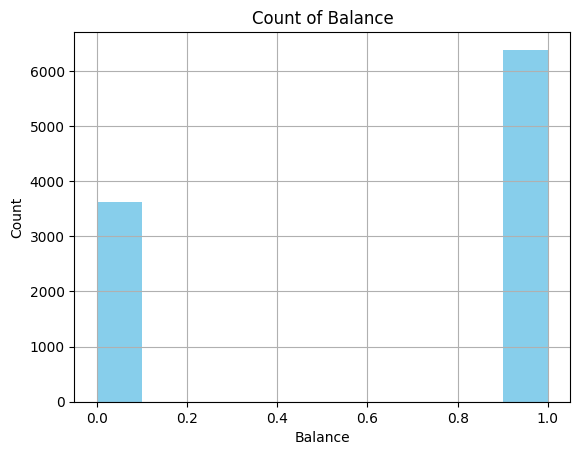

In [ ]:
bank_df['Zero balance'].hist(color='skyblue')
# Add labels to the x and y axes
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Count of Balance')

# Display the plot
plt.show()

In [ ]:
# Group by 'Churn' and 'Geography'
bank_df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     1             4204         4204    4204  4204    4204     4204   
      2             1695         1695    1695  1695    1695     1695   
      3             2064         2064    2064  2064    2064     2064   
1     1              810          810     810   810     810      810   
      2              814          814     814   814     814      814   
      3              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     1                     4204             4204              4204   
      2                     1695             1695              1695   
      3                     2064             2064              2064   
1     1                      810              810               810   
      2                      814              814               814   
      3                      413              413               413   

                 Estimated Salary  Zero balance  
Churn Geography                                  
0     1                      4204          4204  
      2                      1695          1695  
      3                      2064          2064  
1     1                       810           810  
      2                       814           814  
      3                       413           413

Create Model

In [ ]:
# Define features or independent variables and label or dependent variable
x = bank_df.drop(['Surname','Churn'],axis = 1)
y = bank_df['Churn']
x.shape,y.shape

((10000, 11), (10000,))

Handling Imbalance Data

In [ ]:
bank_df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

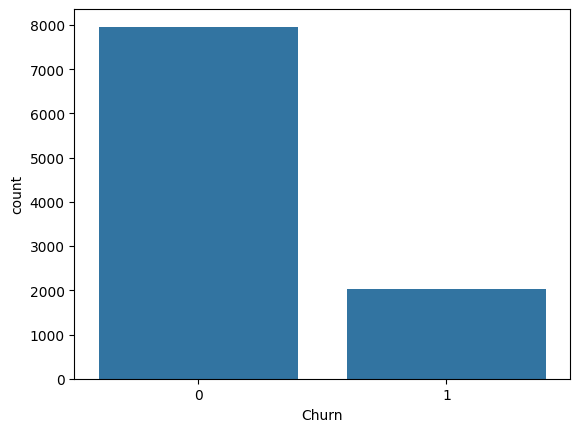

In [ ]:
sb.countplot(x='Churn',data=bank_df)

1. Random Under Sampling

Make sample size of both Churn values equal to lowest value

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=2529)

In [ ]:
x_rus,y_rus = rus.fit_resample(x,y)

In [ ]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


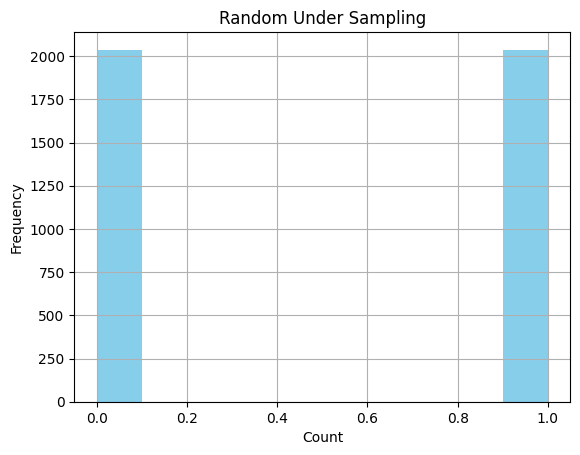

In [ ]:
y_rus.hist(color='skyblue')
# Add labels to the x and y axes
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Random Under Sampling')

# Display the plot
plt.show()

2. Random Over Sampling

Make sample size of both Churn values equal to highest value

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)
x_ros,y_ros = ros.fit_resample(x,y)
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


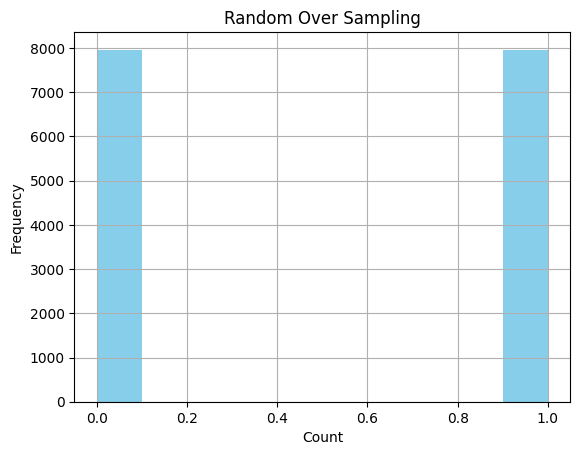

In [ ]:
y_ros.hist(color='skyblue')
# Add labels to the x and y axes
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Random Over Sampling')

# Display the plot
plt.show()

Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529) # split original data

x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=2529) # split random under sample data

x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=2529) # split random over sample data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]) # Standardize train original data
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]) # Standardize test original data

In [ ]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]) # Standardize train random under sample data
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]) # Standardize test random under sample data

In [ ]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]) # Standardize train random over sample data
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]) # Standardize test random over sample data

Apply Support Vector Classification on random under sample data

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()

In [ ]:
# Original data
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)

In [ ]:
# random under sample data
sv.fit(x_train_rus,y_train_rus)
y_pred_rus = sv.predict(x_test_rus)

In [ ]:
# random over sample data
sv.fit(x_train_ros,y_train_ros)
y_pred_ros = sv.predict(x_test_ros)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2387,   27],
       [ 448,  138]])

In [ ]:
# Check accuracy of model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.84      0.24      0.37       586

    accuracy                           0.84      3000
   macro avg       0.84      0.61      0.64      3000
weighted avg       0.84      0.84      0.80      3000



Observation : Recall percentage is very less

Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,.1,.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(x_test)
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [ ]:
# Check accuracy of model
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



Observation : Recall percentage has improved

In [ ]:
svc_rus = SVC()
svc_rus.fit(x_train_rus,y_train_rus)
y_pred_rus = svc_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[469, 158],
       [168, 428]])

In [ ]:
# Check accuracy of model
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       627
           1       0.73      0.72      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



Observation : Recall percentage are much higher than previous model

In [ ]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid_rus.predict(x_test_rus)
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [ ]:
# Check accuracy of model
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



Observation : Recall percentage changed only a little bit

In [ ]:
svc_ros = SVC()
svc_ros.fit(x_train_ros,y_train_ros)
y_pred_ros = svc_ros.predict(x_test_ros)

In [ ]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1830,  549],
       [ 651, 1748]])

In [ ]:
# Check accuracy of model
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2379
           1       0.76      0.73      0.74      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



Observation : Recall percentage in random under sample and random over sample are almost same, but much higher than raw data model

Perform hyper parameter tuning on random over sample

In [ ]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid_ros.predict(x_test_ros)
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [ ]:
# Check accuracy of model
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



Observation : Recall percentage is highest and also accuracy is highest